In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
# importing data 
df=pd.read_csv("car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
print(df["Fuel_Type"].value_counts()
,df["Transmission"].value_counts()
,df["Seller_Type"].value_counts()) 

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64 Transmission
Manual       261
Automatic     40
Name: count, dtype: int64 Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [14]:
# encoding categorical data 

In [24]:
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

In [20]:
df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

C:\Users\MUQEETH_MIRZA\AppData\Local\Temp\ipykernel_20816\1825276789.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)


In [22]:
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

C:\Users\MUQEETH_MIRZA\AppData\Local\Temp\ipykernel_20816\3424820603.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)


In [23]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [25]:
# data splitting

In [29]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [33]:
x=df.drop(["Car_Name","Selling_Price"],axis=1)

In [26]:
y=df["Selling_Price"]

In [34]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [35]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42) 

In [38]:
model=LinearRegression()

In [39]:
model.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
training_data_pred=model.predict(xtrain)

metricsm

In [43]:
errorscore1=metrics.r2_score(training_data_pred,ytrain)

In [44]:
errorscore1

0.8687518544775663

In [45]:
errorscore2=metrics.mean_absolute_error(training_data_pred,ytrain)

In [46]:
errorscore2

1.1761077496252597

visualising actual and predicted values

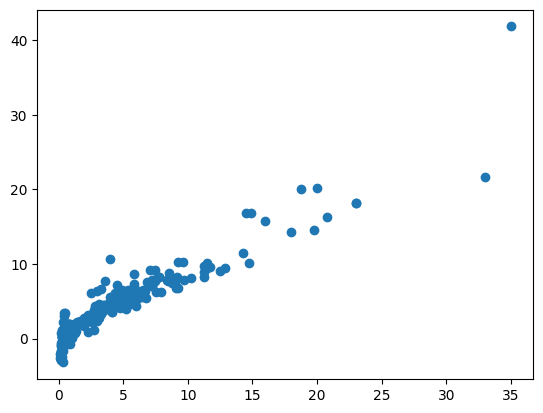

In [59]:
plt.Figure(figsize=(10,10))
plt.scatter(ytrain,training_data_pred)
# plt.plot(ytrain,training_data_pred,color="red",label="regression line")
plt.show()

In [50]:
test_data_pred=model.predict(xtest)

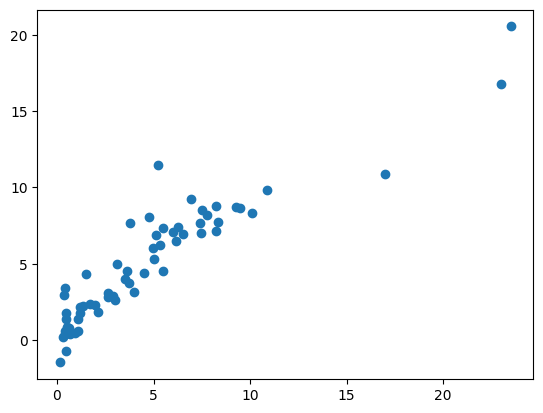

In [64]:
plt.scatter(ytest,test_data_pred)
# plt.plot(ytest,test_data_pred,color="red",label="regression line")

In [54]:
lasso_model=Lasso()

In [55]:
lasso_model.fit(xtrain,ytrain)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [56]:
training_data_pred_lasso=lasso_model.predict(xtrain)

In [62]:
errorscore_lasso=metrics.r2_score(training_data_pred_lasso,ytrain)

In [63]:
errorscore_lasso

0.8072318559989179

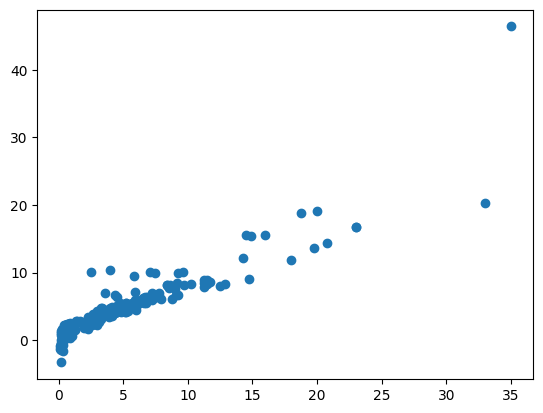

In [58]:
plt.scatter(ytrain,training_data_pred_lasso)
# plt.plot(ytrain,training_data_pred_lasso,color="red",label="regression line")

In [60]:
test_data_pred_laso=lasso_model.predict(xtest)

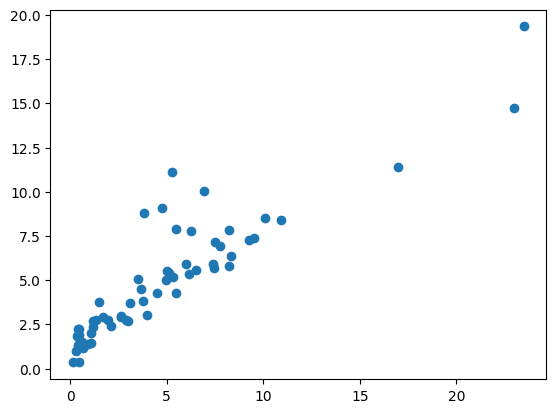

In [65]:
plt.scatter(ytest,test_data_pred_laso)
# plt.plot(ytest,test_data_pred_laso,color="red",label="regression line")

In [68]:
ridge_model=Ridge()

In [69]:
ridge_model.fit(xtrain,ytrain)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [70]:
training_data_pred_ridge=ridge_model.predict(xtrain)

In [71]:
errorscore_ridge=metrics.r2_score(ytrain,training_data_pred_ridge)

In [72]:
errorscore_ridge

0.8839409196005682

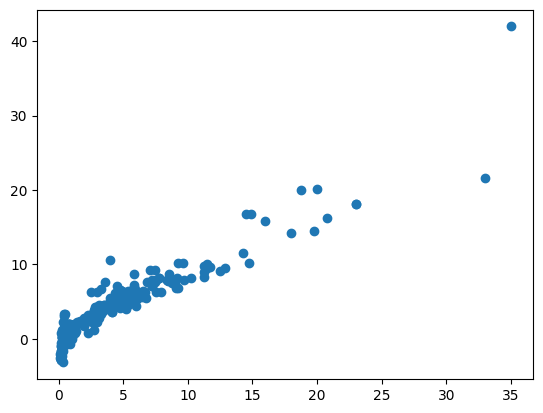

In [73]:
plt.scatter(ytrain,training_data_pred_ridge)

In [75]:
xgb_model=XGBRegressor()

In [76]:
xgb_model.fit(xtrain,ytrain)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [77]:
training_data_pred_xgb=xgb_model.predict(xtrain)

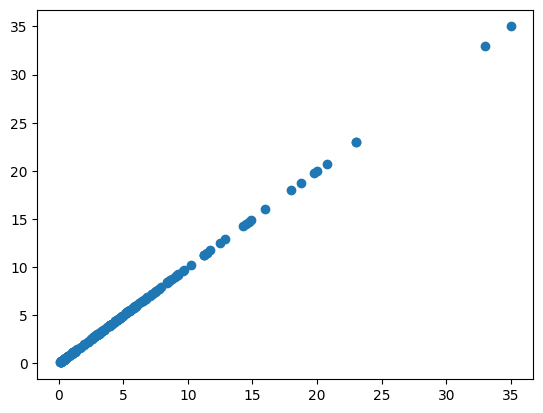

In [78]:
plt.scatter(ytrain,training_data_pred_xgb)

In [79]:
errorscore_xgb=metrics.r2_score(ytrain,training_data_pred_xgb)

In [80]:
errorscore_xgb

0.9999946846491505

In [81]:
test_data_pred_xgb=xgb_model.predict(xtest)

In [82]:
errorscore_xgb_test=metrics.r2_score(ytest,test_data_pred_xgb)

In [84]:
errorscore_xgb_test

0.961328200703924